In [359]:
import numpy as np
import matplotlib.pyplot as plt

In [360]:
import os
import shutil
import time

# Plot Space average of u(t)

In [361]:
dt = 0.01
tspan = 10
tspan/dt

1000.0

In [362]:
dx = 0.1
L = 100

Text(0.5, 1.0, '2D\nC = 1')

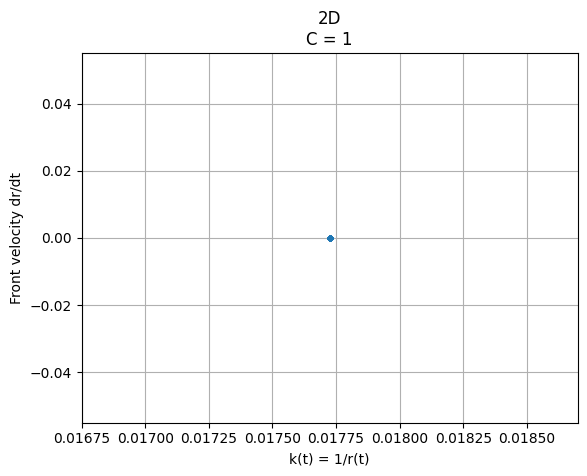

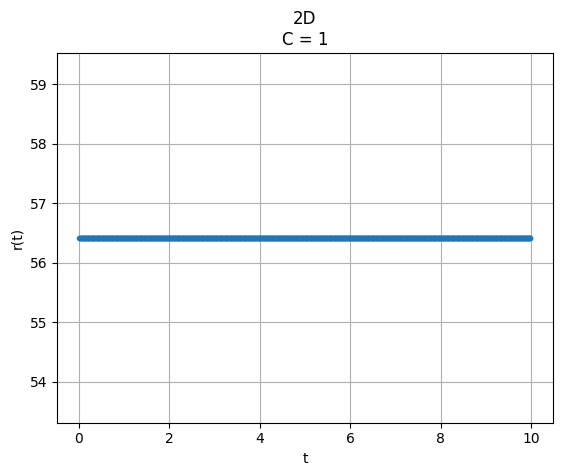

In [363]:
f = open("../fileAveout.dat", "r")
N = int(round(tspan/dt))
tt = np.zeros(N)
ave = np.zeros(N)

i = 0
for row in f:
    a, b = row.split(" ")
    tt[i] = float(a)
    ave[i] = float(b)
    i = i + 1

ns = np.arange(0,i)
#ts = np.arange(0, i, int(T/dt))

# Motion by curvature
fig, ax = plt.subplots()
ax.plot(tt[ns], ave[ns],'.')
#plt.ylim(0)

ax.set_xlabel("k(t) = 1/r(t)")
ax.set_ylabel("Front velocity dr/dt")
#plt.yscale("linear")
ax.grid()
ax.set_title("2D\nC = 1")



# Plot final state u(x, tmax)

/tmp/ipykernel_13747/4016989229.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('Blues'), vmin=-1, vmax=1)
/tmp/ipykernel_13747/4016989229.py:34: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('Blues'), vmin=-1, vmax=1)


Text(0.5, 1.0, 't = 10.000000')

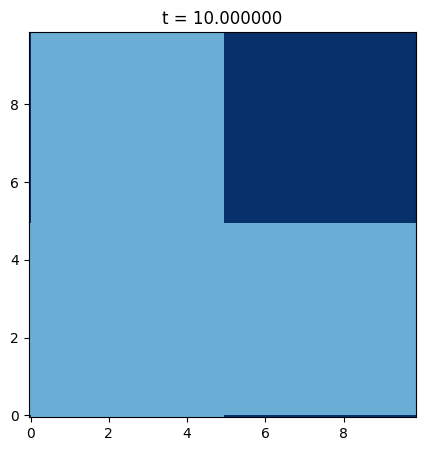

In [364]:
f = open("../state.dat", "r")
N = int(L/dx)
x = np.zeros(N)
y = np.zeros(N)
Z = np.zeros((N,N))
i = 0
for row in f:
    if i != 0:
        a, b, c = row.split(" ")
        #a, b = row.split("	")
        J = np.mod(i-1,N)
        I = int((i-1)/N)
        x[I] = float(a)
        y[J] = float(b)
        Z[I][J] = float(c)
    else:
        N, tmax, dx = row.split(" ")
        dx = float(dx)
        N = int(N)

    i = i + 1

#x = x[0:i-1]
#y = y[0:i-1]

# Make up some fake data
X,Y = np.meshgrid(x,y)

fig = plt.figure(figsize = (5,5))
fig.subplots_adjust(wspace=0.3)

# Blues
#plt.figure(figsize=(10,10))
plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('Blues'), vmin=-1, vmax=1)
#plt.colorbar()
#plt.axis([-3, 3, -3, 3])
plt.title('t = ' + str(tmax))